# keras SVM for cifa10 test
a SVM network networkk for CIFA10 classfier test, correspoding to CS231n assignment1 SVM.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


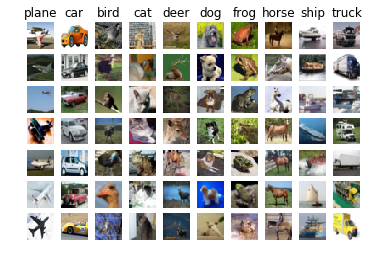

In [2]:
cifar10_data = CIFAR10Data()
plot_cifar10(cifar10_data, 7)

In [3]:
# get stretch data
x_train, y_train, x_test, y_test = cifar10_data.get_stretch_data(subtract_mean=True)
# Subsample data for more efficient code execution
num_training = 5000

mask = list(range(num_training))
x_small_train = x_train[mask]
y_small_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_small_test = x_train[mask]
y_small_test = y_test[mask]


# SVM
test a simple full connected svm classifier

In [6]:
# training 
from classifiers.linear_svm import svm
from keras.optimizers import SGD

num_classes = 10
N, D = x_train.shape

svm_model = svm(classes=num_classes, input_shape=(D, ), weight_decay=9e3)
# svm_model.add(Dense(num_classes, 
#                     input_shape=(D,),
#                     kernel_regularizer=keras.regularizers.l2(9e3),
#                     # kernel_regularizer=None,
#                     kernel_initializer=keras.initializers.random_normal(stddev=1e-3),
#                     use_bias=False,
#                     ))

svm_model.compile(optimizer=SGD(lr=1.6e-7),
                  loss=keras.losses.categorical_hinge,
                  metrics=['accuracy'],
                  )
svm_model.summary()

# TODO: svm loss not num_classes-1 when weight is set small
# loss, acc = svm_model.train_on_batch(x_small_train, y_small_train)
# print(loss, acc)
# class LossHistory(keras.callbacks.Callback):
# 
# 
#     def on_epoch_begin(self, batch, logs={}):
#         lr = K.get_value(self.model.optimizer.lr)
#         print('Ir:', lr)
# 

history = svm_model.fit(x_train, y_train,
                        epochs=6, batch_size=200,
                        validation_split=0.02, shuffle=False,
                        )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Train on 49000 samples, validate on 1000 samples
Epoch 1/6
49000/49000 [==============================] - 4s 78us/step - loss: 151.3227 - acc: 0.1699 - val_loss: 68.7660 - val_acc: 0.2120
Epoch 2/6
49000/49000 [==============================] - 3s 65us/step - loss: 37.2988 - acc: 0.2362 - val_loss: 17.3857 - val_acc: 0.2660
Epoch 3/6
49000/49000 [==============================] - 3s 67us/step - loss: 9.7784 - acc: 0.2823 - val_loss: 4.9598 - val_acc: 0.3100
Epoch 4/6
49000/49000 [==============================] - 3s 68us/step - loss: 3.1230 - acc: 0.3113 - val_loss: 1.9587 - val_acc: 0.3470
Epoch 5/6
49000/49000 [==============================] - 3s 67us/ste

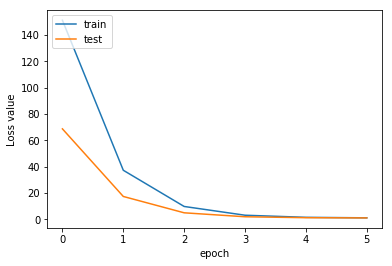

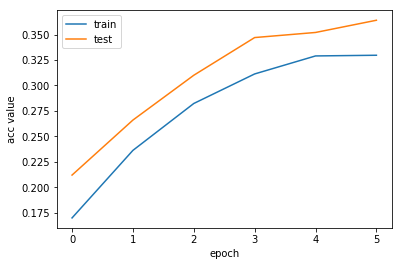

In [7]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [8]:
# evalute SVM model
loss, acc = svm_model.evaluate(x_test, y_test)
print('evaluate loss:%f acc:%f' % (loss, acc))

10000/10000 [==============================] - 1s 92us/step
evaluate loss:1.079230 acc:0.333600
